# Implementation of a (movie) recommendation system

This project implements a simple movie recommendation system using movies data and ratings data. As it uses users previous data to rate movies, it falls under **collaborative filtering**. Had I used specific characteristics of movies, the technic would have been **content based filtering**.

The data for the project consists of a *ratings* file and a *movies* file, both collected from https://media.geeksforgeeks.org/.

In [26]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# set up the graph theme and make sure graphs are generated with the code in the notebook
sns.set_style('dark') 
%matplotlib inline 

In [12]:
# get ratings data 
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_src = pd.read_csv('Data/ratings.tsv', sep='\t', names=column_names)
  
# check ratings data
ratings_src.head() 

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [13]:
# get and examine movies data
movies_src = pd.read_csv('Data/movies.csv', sep=',') 
movies_src.head() 

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
# join the ratings and movies data to create one dataset for analysis
movie_ratings = pd.merge(ratings_src, movies_src, on='item_id') 
movie_ratings.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [15]:
# calculate mean rating of all movies 
movie_ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [16]:
# calculate count rating of all movies 
movie_ratings.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [17]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count()) 
  
ratings.head() 

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


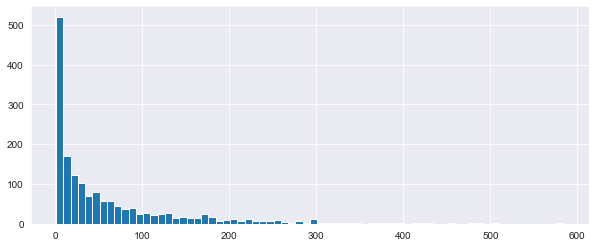

In [20]:
# plot a histogram to see what is the distribution of ratings count across all the movies 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

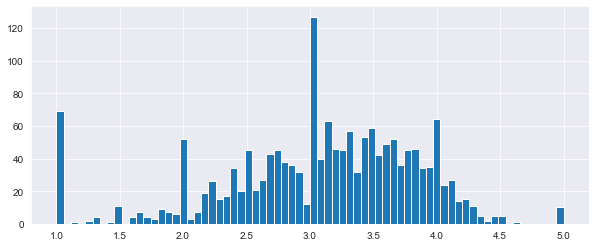

In [21]:
# plot a histogram to see what is the distribution of actual ratings across all the movies 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 

In [28]:
# sorting values according to the 'num of rating column' 
moviefin = movie_ratings.pivot_table(index ='user_id', 
              columns ='title', values ='rating') 
  
moviefin.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [29]:
# analysing correlation with similar movies 
starwars_user_ratings = moviefin['Star Wars (1977)'] 
liarliar_user_ratings = moviefin['Liar Liar (1997)'] 
  
starwars_user_ratings.head() 

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [24]:
# analysing correlation with similar movies 
similar_to_starwars = moviefin.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviefin.corrwith(liarliar_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars.head() 

C:\Users\Anirban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anirban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [30]:
# Similar movies as of liarliar 
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 
  
corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


Putting the steps to find correlated movies in a simple function that will take the name 

In [101]:
def recommend_movies(movnm, topN):
    """
        Args: 
            movnm (str) - name of the movie searching for
            topN (int) - how many correlated movies to return
        Output:
            list of correlated movies with correlation values
    """
    
    # in case the movie is not found, create an empty dataframe proactively
    movierate = pd.DataFrame().reindex_like(moviefin)
    # set execution Y/N flag beforehand and update accordingly
    proceed = 'Y'
    
    try:        
        # filter for the required movie
        movierate = moviefin[movnm]
    except KeyError:
        # handle exception in case the movie is not found
        proceed = 'N'
        print("Movie was not found in database. Please try again.")
    
    # check if the number for the list is integer and proceed
    if(proceed != 'N'):        
        if(isinstance(topN, int)):
            moviesim = moviefin.corrwith(movierate) 
            moviecorr = pd.DataFrame(moviesim, columns =['Correlation']) 
            moviecorr.dropna(inplace = True)
            moviecorr = moviecorr.sort_values(by='Correlation', ascending=False)
            return moviecorr.head(topN)
        else:
            print("Please enter an integer for the number of correlated movies.")

In [100]:
# test the function
recommend_movies('Liar Liar (1997)',5)

C:\Users\Anirban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anirban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Mina Tannenbaum (1994),1.0
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Johnny 100 Pesos (1993),1.0


End of code